## Breast Cancer

Attribute Information:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10

Class: (2 for benign, 4 for malignant)
Malignant ==> Cancerous
Benign ==> Not Cancerous (Healthy)

Link: [Breast Cancer](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29)

In [2]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# import data set
cancer = pd.read_csv("breastCancer.csv")
cancer

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


## Data Pre-processing

In [4]:
cancer['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [5]:
cancer.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [6]:
# object
cancer['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [7]:
# something different in bare_nucleoli
cancer[cancer['bare_nucleoli']=='?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [8]:
# replace ? with nan
df = cancer.replace('?', np.nan)

In [9]:
df

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [10]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [11]:
# replace nan by median (1.0)
df = df.fillna(df.median())

In [12]:
# change bare_nucleoli data type to int
df['bare_nucleoli'] = df['bare_nucleoli'].astype(int)

In [13]:
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

In [14]:
# replace benign and malignant to 0 and 1
df['class'] = df['class'].map({2:'0', 4:'1'})

## Exploratory Data Analysis

In [15]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [16]:
# remove id which we don't need in training models
df.drop('id', axis= 1, inplace=True)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

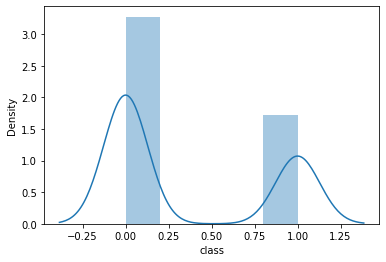

In [18]:
sns.distplot(df['class'])

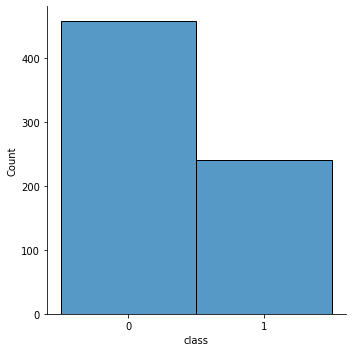

In [45]:
sns.displot(df['class'])

### Multivariate Data Analysis

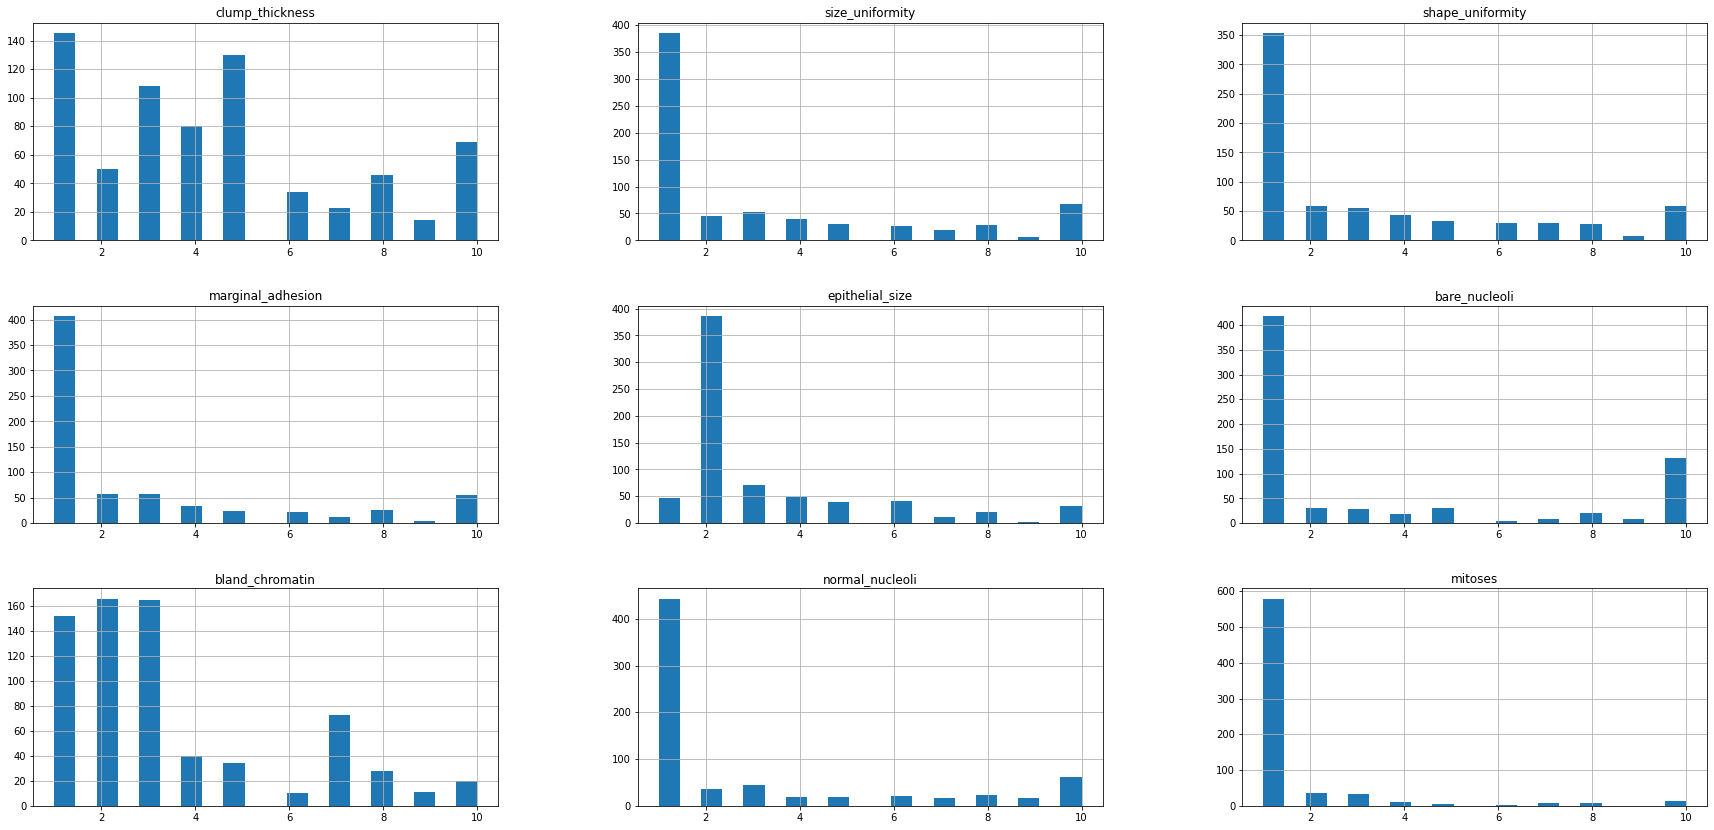

In [19]:
df.hist(bins=20, figsize=(30, 30), layout=(6, 3));

<AxesSubplot:>

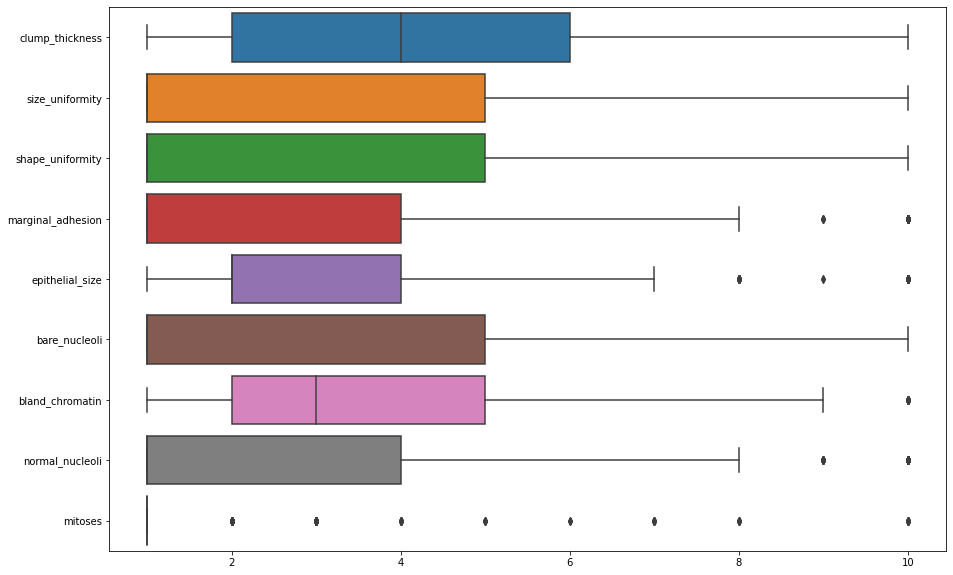

In [20]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')

In [21]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000


<AxesSubplot:>

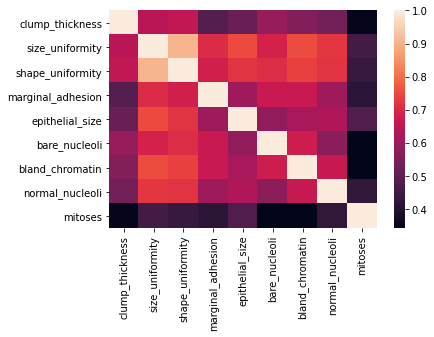

In [22]:
# plotting heat map to demonstrate the correlations
sns.heatmap(df.corr())

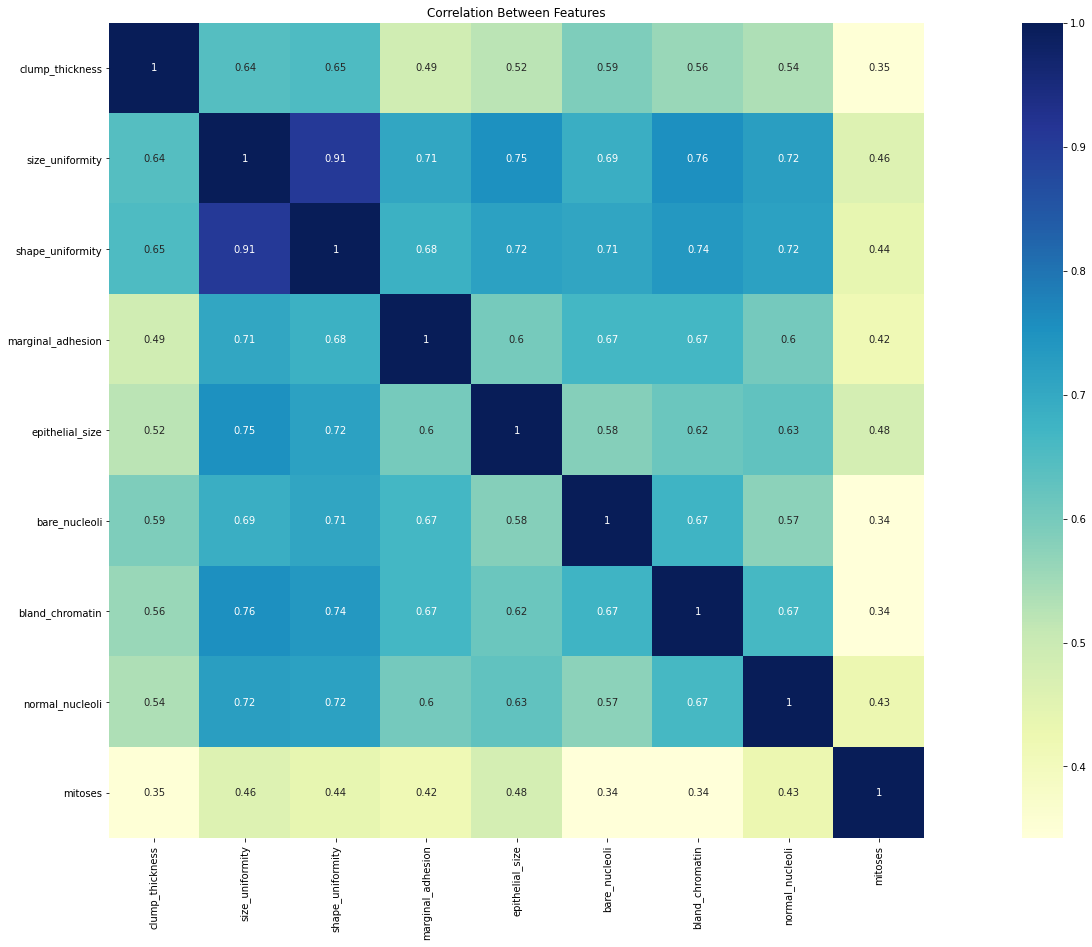

In [23]:
# plotting heatmap with more info
plt.figure(figsize=(35, 15))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap="YlGnBu")
plt.title("Correlation Between Features")
plt.show()

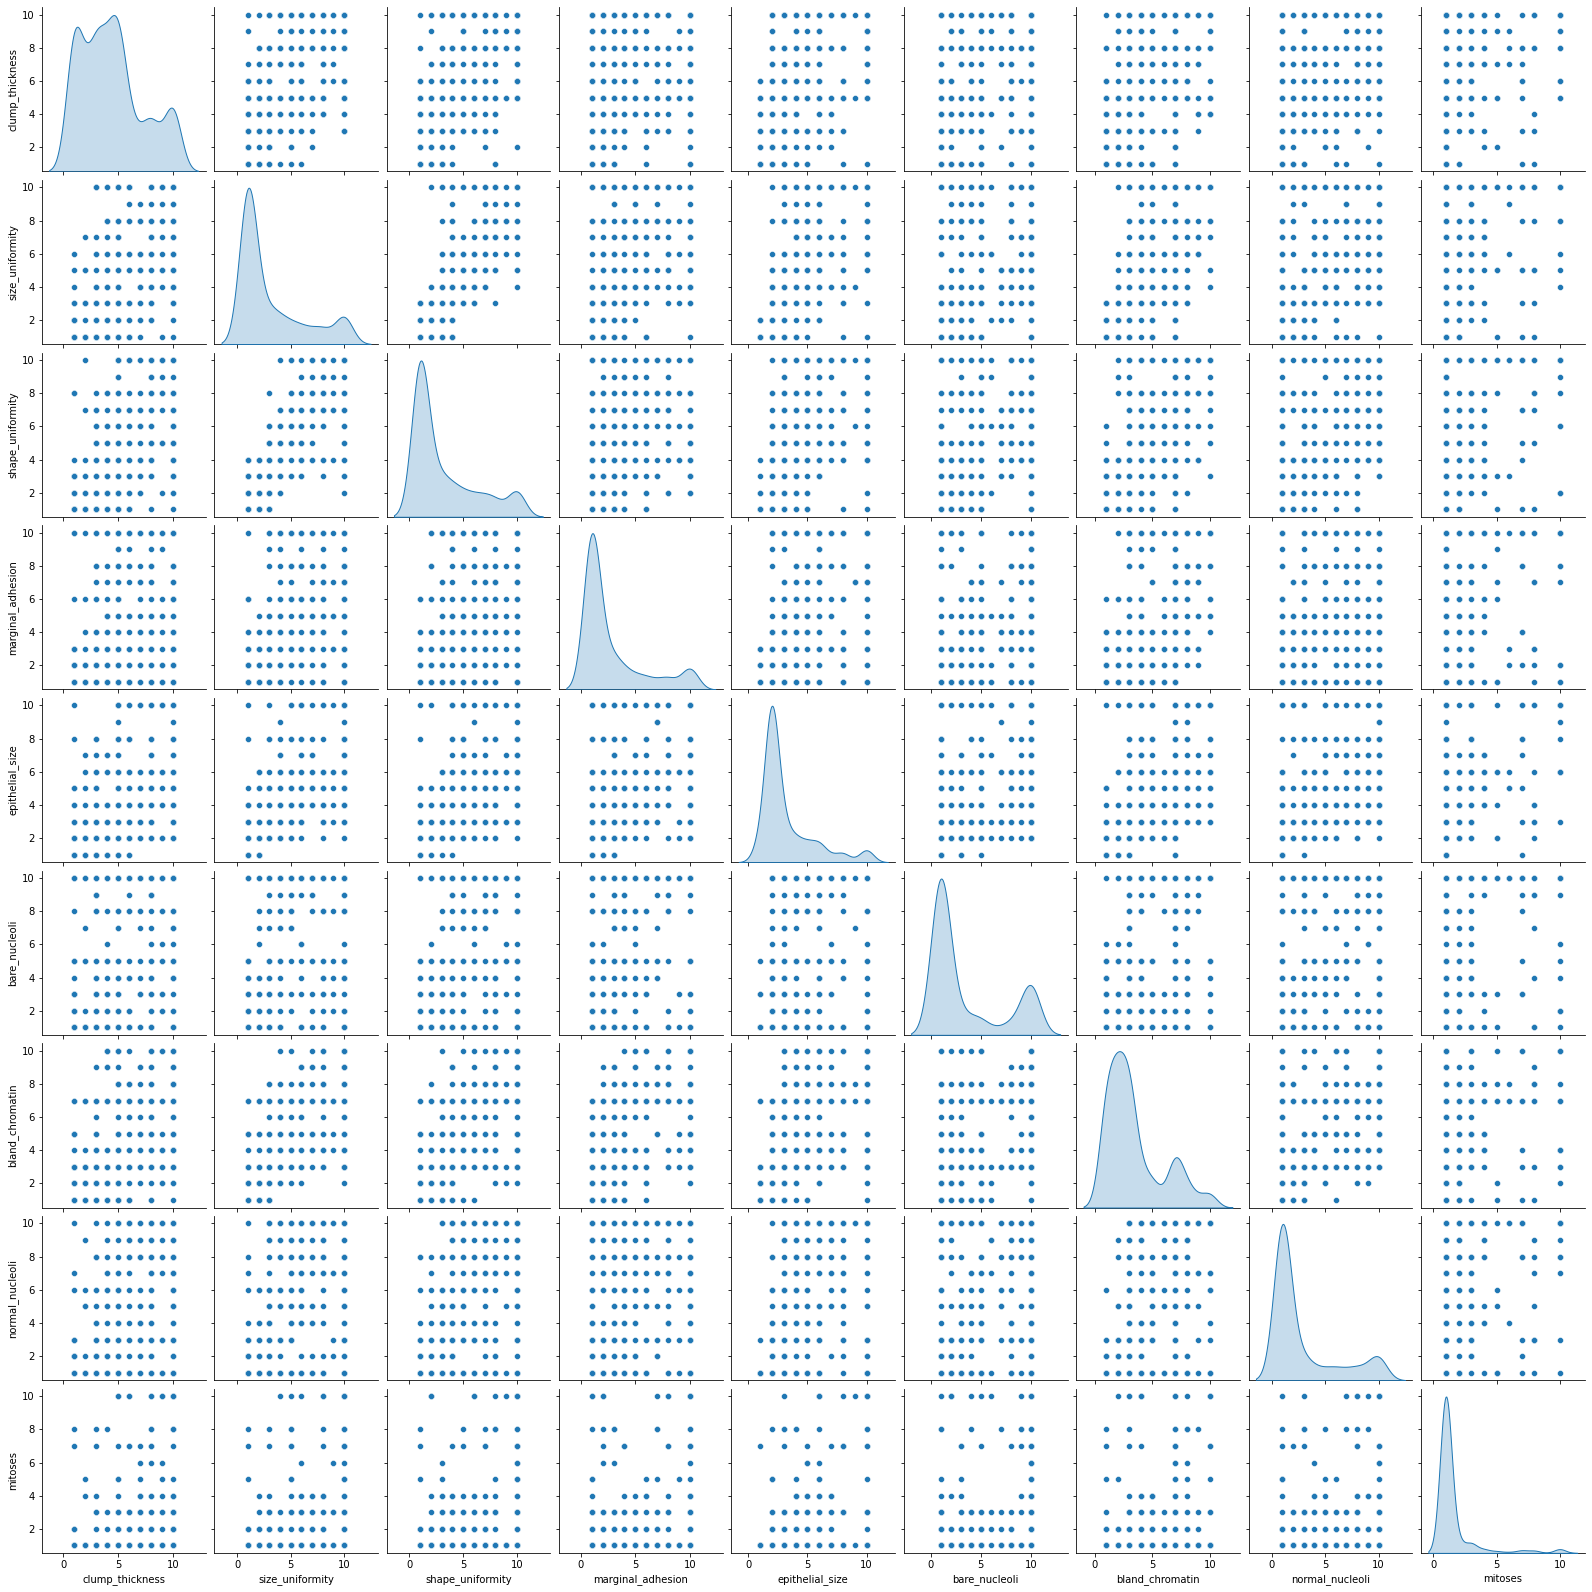

In [24]:
# plotting distributions plus data points 
sns.pairplot(df, diag_kind="kde")

### Building Models

In [25]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [26]:
# inputs and labels
X = df.drop('class', axis=1)
y = df['class']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# split inputs and labels into training and test data, 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### KNN Classifier 

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
KNN = KNeighborsClassifier(n_neighbors=5, weights="distance")

In [31]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [32]:
pred_knn = KNN.predict(X_test)
pred_knn

array(['0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0',
       '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0',
       '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0',
       '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0',
       '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1

In [33]:
# show the prediction score for KNN
print("KNN Prediction Score: {0:.2f}%" .format(KNN.score(X_test, y_test)*100))

KNN Prediction Score: 97.14%


### Support Vector Machine

In [34]:
from sklearn.svm import SVC

svm = SVC(gamma=0.025, C=3)
svm.fit(X_train, y_train)

SVC(C=3, gamma=0.025)

In [35]:
pred_svm = svm.predict(X_test)
pred_svm

array(['0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0',
       '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0',
       '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0',
       '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0',
       '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1

In [36]:
print("KNN Prediction Score: {0:.2f}%" .format(svm.score(X_test, y_test)*100))

KNN Prediction Score: 98.10%


In [37]:
df_knn = pd.DataFrame(pred_knn)
df_svm = pd.DataFrame(pred_svm)

In [38]:
df1 = pd.concat([df_knn, df_svm], axis=1)
df1.columns = [['KNN_Pred', 'SVM_pred']]
df1 # 0: benign, 1: malignant

,KNN_Pred,SVM_pred
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
205,1,1
206,1,1
207,0,0
208,0,0


### Reports

In [39]:
from sklearn.metrics import classification_report, confusion_matrix


In [40]:
print('KNN Classification Report')
print('...'*10)
print(classification_report(y_test, pred_knn))

KNN Classification Report
..............................
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       137
           1       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



In [41]:
print('SVM Classification Report')
print('...'*10)
print(classification_report(y_test, pred_svm))

SVM Classification Report
..............................
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       137
           1       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



Confusion Matrix for KNN


<AxesSubplot:>

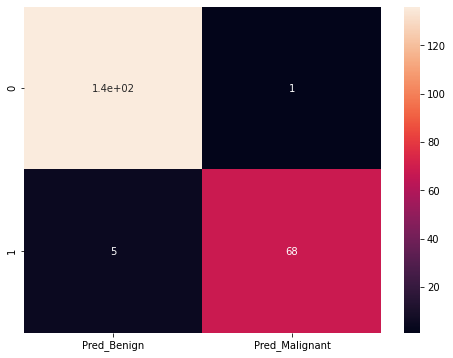

In [42]:
print('Confusion Matrix for KNN')
cm = confusion_matrix(y_test, pred_knn, labels=['0', '1'])
df_cm = pd.DataFrame(cm, index=[i for i in ['0', '1']], columns = [i for i in ['Pred_Benign', 'Pred_Malignant']])
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot= True)

Confusion Matrix for SVM


<AxesSubplot:>

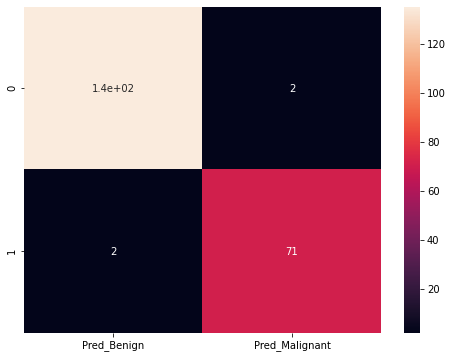

In [43]:
print('Confusion Matrix for SVM')
cm = confusion_matrix(y_test, pred_svm, labels=['0', '1'])
df_cm = pd.DataFrame(cm, index=[i for i in ['0', '1']], columns = [i for i in ['Pred_Benign', 'Pred_Malignant']])
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot= True)

## Conclusion

In this example, I demonstrate the following steps:
- Import dependencies 
- Import datasets (pd.read_csv())
- Data Pre-processing
- Exploratory Data Analysis
- Data Modeling
- Model Evaluation

From these two models, Support Vector Machine performs better than K Nearest Neighbor with 1% more accurately. Besides, from the confusion matrix, Support Vector Classifier holds better performance in classifying Benign and Malignant than K Nearest Neighbor.

In conclusion, I'll prefer Support Vector Machine in this example.

In [44]:
# from pyforest import *
# lazy_imports()